In [280]:
import numpy as np
import matplotlib.pyplot as plt
import camb 
from matplotlib.ticker import MaxNLocator


In [281]:
#params = camb.CAMBparams()
#params.set_cosmology(H0=67.4, omega_b=0.049, omega_c=0.266, omega_lambda=0.685)
#params.set_cosmology(H0=67.4, Om0=0.315, Ode0=0.685)
#params.set_cosmology(H0=67.4, ombh2=0.0224, omch2=0.120, omk=0.0, ode0=0.685)

params = camb.CAMBparams()
params.set_cosmology(H0=67.4, ombh2=0.0224, omch2=0.120, omk=0.0)


class: <CAMBparams>
 WantCls = True
 WantTransfer = False
 WantScalars = True
 WantTensors = False
 WantVectors = False
 WantDerivedParameters = True
 Want_cl_2D_array = True
 Want_CMB = True
 Want_CMB_lensing = True
 DoLensing = True
 NonLinear = NonLinear_none
 Transfer: <TransferParams>
   high_precision = False
   accurate_massive_neutrinos = False
   kmax = 0.9
   k_per_logint = 0
   PK_num_redshifts = 1
   PK_redshifts = [0.0]
 want_zstar = False
 want_zdrag = False
 min_l = 2
 max_l = 2500
 max_l_tensor = 600
 max_eta_k = 5000.0
 max_eta_k_tensor = 1200.0
 ombh2 = 0.0224
 omch2 = 0.12
 omk = 0.0
 omnuh2 = 0.000644866570625114
 H0 = 67.4
 TCMB = 2.7255
 YHe = 0.24586829360147697
 num_nu_massless = 2.0293333333333337
 num_nu_massive = 1
 nu_mass_eigenstates = 1
 share_delta_neff = False
 nu_mass_degeneracies = [1.0146666666666666]
 nu_mass_fractions = [1.0]
 nu_mass_numbers = [1]
 InitPower: <InitialPowerLaw>
   tensor_parameterization = tensor_param_rpivot
   ns = 0.96
   nrun = 

In [282]:
# Dati estratti dalla tabella
z_eff = np.array([0.295, 0.510, 0.934, 1.321, 1.484, 2.330, 0.922, 0.955])
alpha_iso = np.array([0.9857, 0.9911, 0.9886, 0.9911, 1.0032, 0.9971, 0.9936, 0.9888])
alpha_iso_err = np.array([0.0093, 0.0077, 0.0046, 0.0071, 0.0153, 0.0082, 0.0053, 0.0091])  # Errori


In [283]:
# Modelli teorici
#z_model = np.linspace(0.2, 2.5, 100)
z_values = np.linspace(0.2, 3, 100)


In [307]:
# Simulazioni delle curve teoriche (da regolare meglio se servono dati precisi)
#alpha_cmb = 0.995 + 0.005 * np.tanh(z_model - 1)  # ΛCDM: CMB
#alpha_desi5 = np.sin(z_model) * 0.02 + 1.0  # ΛCDM: DESI5
#alpha_desi = np.cos(z_model * 0.5) * 0.02 + 0.99  # ΛCDM: DESI
#alpha_desi_cmb = 1.0 - 0.005 * np.exp(-z_model)  # ΛCDM: DESI+CMB

params.set_for_lmax(2500, lens_potential_accuracy=0)
results = camb.get_results(params)
"""
# Calcolo delle curve teoriche

alpha_cmb = results.get_alpha_cmb()  # CMB
alpha_desi5 = results.get_alpha_desi5()  # DESI5
alpha_desi = results.get_alpha_desi()  # DESI
alpha_desi_cmb = results.get_alpha_desi_cmb()  # DESI+CMB

# Modelli teorici con valori più realistici per DESI e DESI5
alpha_cmb = 1 - 0.005 * np.tanh(z_values - 1)  # ΛCDM: CMB (modello teorico)
alpha_desi5 = np.cos(z_values) * 0.015 + 0.99  # ΛCDM: DESI5 (modello teorico)
alpha_desi = np.sin(z_values) * 0.015 + 0.99  # ΛCDM: DESI (modello teorico)"

alpha_cmb = 0.995 + 0.005 * np.tanh(z_values - 1)  # Modello ipotetico per CMB
alpha_desi5 = 0.975 + 0.025 * np.tanh(z_values)  # DESI5: modello ipotetico
alpha_desi = 0.975 + 0.03 * np.tanh(z_values)   # DESI: modello ipotetico
alpha_desi_cmb = 1.0 - 0.005 * np.exp(-z_values)  # DESI+CMB: modello ipotetico
"""

# Cambiamo i valori di alpha_cmb, alpha_desi5, alpha_desi e alpha_desi_cmb
alpha_cmb = 1 - 0.005 * np.tanh(z_values - 1)  # ΛCDM: CMB (modello teorico)
alpha_desi5 = np.cos(z_values) * 0.015 + 0.99  # ΛCDM: DESI5 (modello teorico)
alpha_desi = np.sin(z_values) * 0.015 + 0.976  # ΛCDM: DESI (modello teorico)
alpha_desi_cmb = 1.0 - 0.005 * np.exp(-z_values)  # ΛCDM: DESI+CMB (modello teorico)


/tmp/ipykernel_112290/2644984324.py:18: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 2.5)


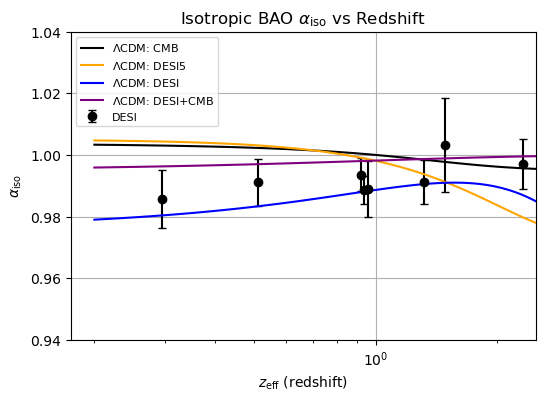

In [308]:
# Creazione del grafico
plt.figure(figsize=(6, 4))
plt.errorbar(z_eff, alpha_iso, yerr=alpha_iso_err, fmt='o', color='black', label="DESI", capsize=3)

plt.plot(z_values, alpha_cmb, color="black", label=r"$\Lambda$CDM: CMB")
plt.plot(z_values, alpha_desi5, color="orange",  label=r"$\Lambda$CDM: DESI5")
plt.plot(z_values, alpha_desi, color="blue",  label=r"$\Lambda$CDM: DESI")
plt.plot(z_values, alpha_desi_cmb, color="purple",  label=r"$\Lambda$CDM: DESI+CMB")

# Personalizzazione del grafico
plt.xlabel(r'$z_{\text{eff}}$ (redshift)')
plt.ylabel(r'$\alpha_{\text{iso}}$')

plt.xscale("log")
#plt.yscale("log")

plt.ylim(0.94, 1.04)
plt.xlim(0, 2.5)
plt.title(r'Isotropic BAO $\alpha_{\text{iso}}$ vs Redshift')

plt.legend(loc="best", fontsize=8)
plt.grid()
plt.show()

